In [1]:
import tools
import datetime
import numpy as np

In [2]:
df = tools.load_dataframe(use_pandas_datatime=True)

In [5]:
print '\n Data Types:'
print df.dtypes
print df.head()


 Data Types:
DAY               datetime64[ns]
HOUR                       int64
OPCAT_CATEGORY            object
SIZE                       int64
SUBBRANCH_ID               int64
dtype: object
         DAY  HOUR OPCAT_CATEGORY  SIZE  SUBBRANCH_ID
0 2014-10-25    16             SM    26       1005609
1 2014-04-14    11             SM    21       1005625
2 2014-10-25    11             SM    36       1005609
3 2015-08-14    12             CM   175       1006034
4 2014-04-14    12             SM    29       1005625


In [36]:
def select(df, SUBBRANCH_ID, OPCAT_CATEGORY, HOUR):
    ts = df[(df["SUBBRANCH_ID"] == SUBBRANCH_ID) & (
        (df["OPCAT_CATEGORY"] == OPCAT_CATEGORY) | (df["OPCAT_CATEGORY"] == "?")) & (
        df["HOUR"] == HOUR)][["DAY", "SIZE"]]
    ts = ts.set_index(['DAY'])
    ts.sort_index(inplace=True)
    return ts['SIZE']


select(df, 1005609, "CM", 8).head()

DAY
2013-07-11    30
2013-07-12    28
2013-07-15    36
2013-07-16    61
2013-07-17    31
Name: SIZE, dtype: int64

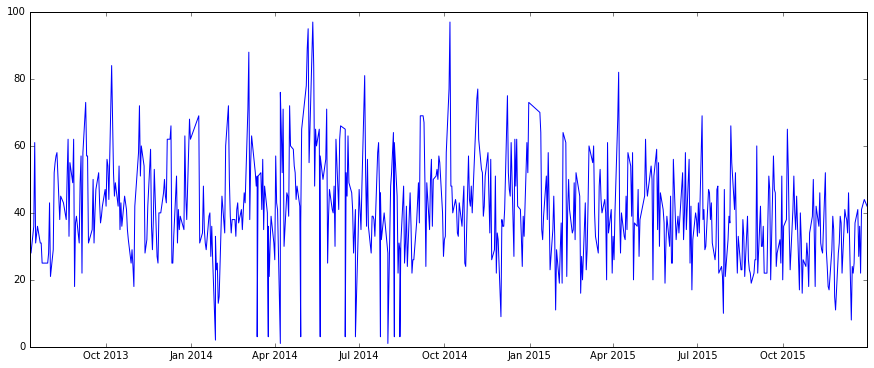

In [37]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

plt.plot(select(df, 1005609, "CM", 8))

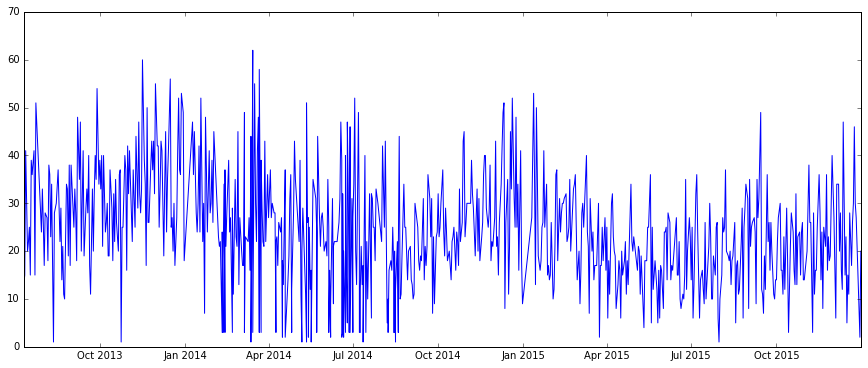

In [38]:
plt.plot(select(df, 1005609, "SM", 14))

In [60]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
def get_p_value(timeseries):
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]

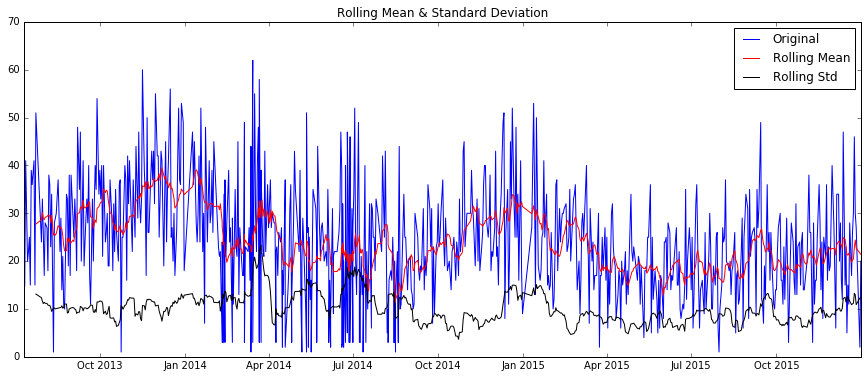

Results of Dickey-Fuller Test:
Test Statistic                  -3.068517
p-value                          0.028973
#Lags Used                      16.000000
Number of Observations Used    741.000000
Critical Value (5%)             -2.865448
Critical Value (1%)             -3.439206
Critical Value (10%)            -2.568851
dtype: float64


In [40]:
test_stationarity(select(df, 1005609, "SM", 14))

In [81]:
for category in ["SM", "CM"]:
    for office in df["SUBBRANCH_ID"].value_counts().keys():
        for hour in xrange(8, 20):
            ts = select(df, office, category, hour)
            p_value = get_p_value(ts)
            if p_value > 0.05:
                print "p_value > 0.05:", category, office, hour

p_value > 0.05: SM 1005625 18
p_value > 0.05: SM 1006034 16
p_value > 0.05: SM 1005839 13
p_value > 0.05: CM 1006034 9
p_value > 0.05: CM 1006034 14
p_value > 0.05: CM 1005839 19


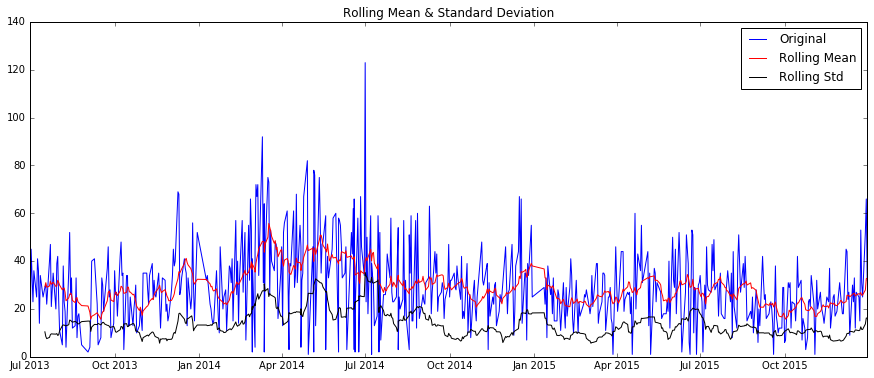

Results of Dickey-Fuller Test:
Test Statistic                  -2.672047
p-value                          0.079002
#Lags Used                      19.000000
Number of Observations Used    608.000000
Critical Value (5%)             -2.866305
Critical Value (1%)             -3.441151
Critical Value (10%)            -2.569308
dtype: float64


In [82]:
test_stationarity(select(df, 1005839, "CM", 19))

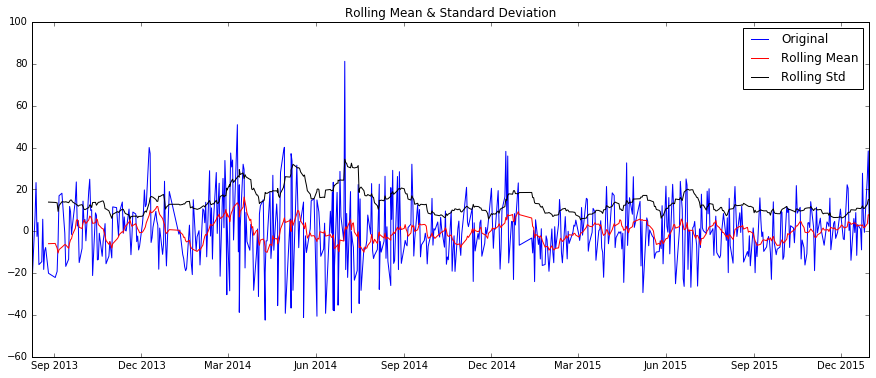

Results of Dickey-Fuller Test:
Test Statistic                -6.640510e+00
p-value                        5.424908e-09
#Lags Used                     1.200000e+01
Number of Observations Used    5.880000e+02
Critical Value (5%)           -2.866468e+00
Critical Value (1%)           -3.441520e+00
Critical Value (10%)          -2.569394e+00
dtype: float64


In [83]:
ts = select(df, 1005839, "CM", 19)

ts_moving_avg_diff = (ts - ts.rolling(window=28,center=False).mean()).dropna()
test_stationarity(ts_moving_avg_diff)

In [79]:
for category in ["SM", "CM"]:
    for office in df["SUBBRANCH_ID"].value_counts().keys():
        for hour in xrange(8, 20):
            ts = select(df, office, category, hour)
            ts_moving_avg_diff = (ts - ts.rolling(window=28,center=False).mean()).dropna()
            p_value = get_p_value(ts_moving_avg_diff)
            if p_value > 0.05:
                print category, office, hour

# What to do with 20-23 hours interval?

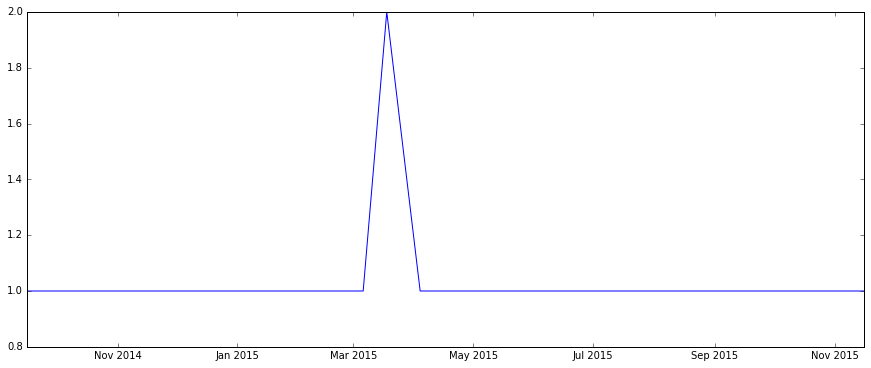

In [68]:
plt.plot(select(df, 1005609, "CM", 21))

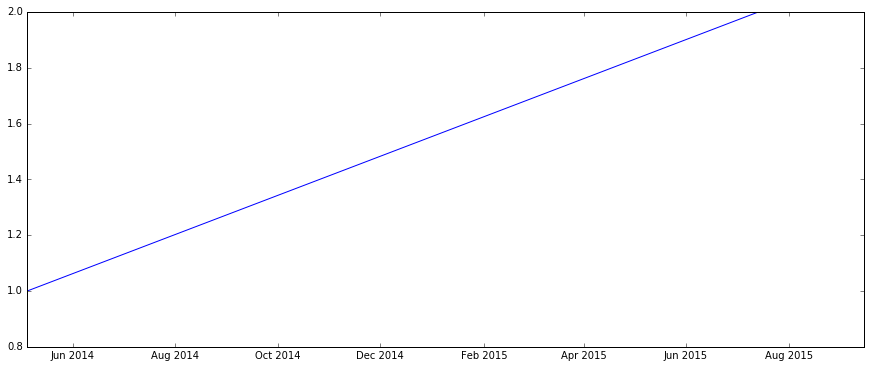

In [69]:
plt.plot(select(df, 1005609, "SM", 21))

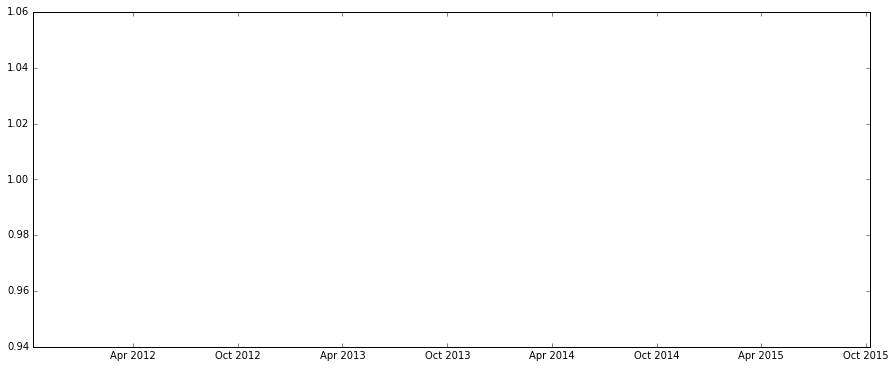

In [70]:
plt.plot(select(df, 1005609, "SM", 22))